In [60]:
import pandas as pd 
import numpy as np

In [61]:
recipe =pd.read_csv('recipes.csv')
# recipe.head()

In [62]:
recipe.drop(
  ['RecipeYield', 'RecipeServings', 'ReviewCount', 'AggregatedRating',
   'RecipeIngredientParts', 'RecipeIngredientQuantities', 'DatePublished',
   'TotalTime', 'PrepTime', 'CookTime', 'AuthorName', 'AuthorId'],
  axis=1,
  inplace=True,
  errors='ignore'
)

In [63]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             522517 non-null  int64  
 1   Name                 522517 non-null  object 
 2   Description          522512 non-null  object 
 3   Images               522516 non-null  object 
 4   RecipeCategory       521766 non-null  object 
 5   Keywords             505280 non-null  object 
 6   Calories             522517 non-null  float64
 7   FatContent           522517 non-null  float64
 8   SaturatedFatContent  522517 non-null  float64
 9   CholesterolContent   522517 non-null  float64
 10  SodiumContent        522517 non-null  float64
 11  CarbohydrateContent  522517 non-null  float64
 12  FiberContent         522517 non-null  float64
 13  SugarContent         522517 non-null  float64
 14  ProteinContent       522517 non-null  float64
 15  RecipeInstruction

In [64]:
recipe.isnull().sum()

RecipeId                   0
Name                       0
Description                5
Images                     1
RecipeCategory           751
Keywords               17237
Calories                   0
FatContent                 0
SaturatedFatContent        0
CholesterolContent         0
SodiumContent              0
CarbohydrateContent        0
FiberContent               0
SugarContent               0
ProteinContent             0
RecipeInstructions         0
dtype: int64

In [65]:
recipe.shape

(522517, 16)

In [66]:
recipe['Keywords'] = recipe['Keywords'].fillna('Unknown')
recipe['RecipeCategory']= recipe['RecipeCategory'].fillna('Unknown')


In [67]:
recipe.dropna(subset=['Images'], inplace=True)
recipe.dropna(subset=['Description'], inplace=True)

In [68]:
recipe.isnull().sum()

RecipeId               0
Name                   0
Description            0
Images                 0
RecipeCategory         0
Keywords               0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeInstructions     0
dtype: int64

In [69]:
recipe.shape

(522512, 16)

In [70]:
# till this null value and unnecessary columns are removed

In [71]:
import re

def parse_keywords(val):
    if pd.isnull(val):
        return []
    if val.startswith('c('):  # clean R-style c("...")
        val = re.sub(r'c\((.*?)\)', r'\1', val)
    return [kw.strip().strip('"').strip("'") for kw in val.strip("[]{}()").split(",")]

recipe['Keywords'] = recipe['Keywords'].apply(parse_keywords)


In [72]:
recipe['Keywords'].dropna().head(10)

0    [Dessert, Low Protein, Low Cholesterol, Health...
1    [Chicken Thigh & Leg, Chicken, Poultry, Meat, ...
2    [Low Protein, Low Cholesterol, Healthy, Summer...
3    [Beans, Vegetable, Low Cholesterol, Weeknight,...
4    [Low Protein, Vegan, Low Cholesterol, Healthy,...
5           [Dessert, Weeknight, Stove Top, < 4 Hours]
6                           [Poultry, Meat, < 60 Mins]
7       [Dessert, Healthy, Weeknight, Oven, < 4 Hours]
8                 [Thai, Asian, Free Of..., < 30 Mins]
9    [Cookie & Brownie, Fruit, Nuts, Weeknight, Ove...
Name: Keywords, dtype: object

In [73]:

recipe['RecipeCategory'].value_counts()

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Snacks Sweet             1
Fish Salmon              1
Guatemalan               1
Coconut Cream Pie        1
Labor Day                1
Name: count, Length: 312, dtype: int64

In [74]:
health = pd.read_csv('health_fitness_dataset.csv')

In [75]:
health.head()


,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33


In [76]:
# checking the values of fitness level in the dataset 
health['health_condition'].value_counts()

health_condition
Hypertension    99437
Diabetes        64754
Asthma          33235
Name: count, dtype: int64

In [77]:
health.shape

(687701, 23)

In [78]:
health.dropna(inplace=True)
# health.isnull().sum()

In [79]:
health.head()

,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
1164,6,2024/1/1,61,M,178.6,79.43,24.90,Swimming,37.6,Medium,...,68.7,123.0,78.0,5.03,7.5,5,3.3,Never,Diabetes,0.09
1165,6,2024/1/3,61,M,178.6,77.30,24.23,Cycling,46.8,Low,...,68.7,123.0,78.0,5.05,5.2,8,2.2,Never,Diabetes,0.17
1166,6,2024/1/7,61,M,178.6,73.86,23.15,Cycling,45.4,High,...,68.7,123.0,78.0,5.08,7.1,5,2.1,Never,Diabetes,0.31
1167,6,2024/1/10,61,M,178.6,79.43,24.90,Dancing,24.9,Low,...,68.7,123.0,78.0,5.10,6.1,8,1.6,Never,Diabetes,0.33
1168,6,2024/1/12,61,M,178.6,79.43,24.90,Cycling,41.9,Medium,...,68.7,123.0,78.0,5.13,5.4,7,2.6,Never,Diabetes,0.43


In [80]:
# select important columns from the dataset
health = health[['health_condition',  'activity_type','age','gender','height_cm','weight_kg','bmi','calories_burned',]]
health.head()


,health_condition,activity_type,age,gender,height_cm,weight_kg,bmi,calories_burned
1164,Diabetes,Swimming,61,M,178.6,79.43,24.90,8.3
1165,Diabetes,Cycling,61,M,178.6,77.30,24.23,9.7
1166,Diabetes,Cycling,61,M,178.6,73.86,23.15,16.7
1167,Diabetes,Dancing,61,M,178.6,79.43,24.90,1.8
1168,Diabetes,Cycling,61,M,178.6,79.43,24.90,11.6


In [81]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197426 entries, 1164 to 687242
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   health_condition  197426 non-null  object 
 1   activity_type     197426 non-null  object 
 2   age               197426 non-null  int64  
 3   gender            197426 non-null  object 
 4   height_cm         197426 non-null  float64
 5   weight_kg         197426 non-null  float64
 6   bmi               197426 non-null  float64
 7   calories_burned   197426 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 13.6+ MB


In [82]:
# selecting the important columns from the recipe dataset
recipe = recipe[['Name', 'Description', 'Images', 'RecipeInstructions', 'Keywords', 'RecipeCategory', 'Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent', 'SodiumContent', 'SugarContent', 'CholesterolContent']]

In [83]:
recipe.shape

(522512, 14)

In [84]:
#add the recipe type to the dataset
recipe['Type'] = np.random.choice(['Vegetarian', 'Non-Vegetarian'], size=len(recipe), p=[0.5, 0.5])


In [85]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522512 entries, 0 to 522516
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Name                 522512 non-null  object 
 1   Description          522512 non-null  object 
 2   Images               522512 non-null  object 
 3   RecipeInstructions   522512 non-null  object 
 4   Keywords             522512 non-null  object 
 5   RecipeCategory       522512 non-null  object 
 6   Calories             522512 non-null  float64
 7   FatContent           522512 non-null  float64
 8   CarbohydrateContent  522512 non-null  float64
 9   ProteinContent       522512 non-null  float64
 10  FiberContent         522512 non-null  float64
 11  SodiumContent        522512 non-null  float64
 12  SugarContent         522512 non-null  float64
 13  CholesterolContent   522512 non-null  float64
 14  Type                 522512 non-null  object 
dtypes: float64(8), object(

In [86]:
def classify_veg(ingredients):
  non_veg_keywords = ['chicken', 'mutton', 'beef', 'pork', 'fish', 'egg', 'bacon', 'shrimp']
  for item in ingredients.split():
    if any(kw in item.lower() for kw in non_veg_keywords):
      return 'Non-Vegetarian'
  return 'Vegetarian'

# Apply the function to classify recipes
recipe['Type'] = recipe['RecipeInstructions'].apply(classify_veg)

# Check the counts of vegetarian and non-vegetarian recipes
print(recipe['Type'].value_counts())

Type
Vegetarian        275835
Non-Vegetarian    246677
Name: count, dtype: int64


In [87]:
print(recipe['RecipeCategory'].value_counts())

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Snacks Sweet             1
Fish Salmon              1
Guatemalan               1
Coconut Cream Pie        1
Labor Day                1
Name: count, Length: 312, dtype: int64


In [88]:
# # writing the dataset values in to lowercase
recipe['RecipeCategory'] = recipe['RecipeCategory'].str.lower()

# The 'Keywords' column is not a string column; it's either float or list after previous processing.
# If you want to lowercase keywords, and they are lists, use:
if recipe['Keywords'].apply(lambda x: isinstance(x, list)).all():
  recipe['Keywords'] = recipe['Keywords'].apply(lambda kws: [kw.lower() for kw in kws] if isinstance(kws, list) else kws)
recipe['Name'] = recipe['Name'].str.lower()
recipe['Description'] = recipe['Description'].str.lower()
recipe['RecipeInstructions'] = recipe['RecipeInstructions'].str.lower()
recipe['Type']=recipe['Type'].str.lower()

In [89]:
print(recipe['Images'].value_counts(10))

Images
character(0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [90]:
import pandas as pd

def parse_r_list(val):
    if pd.isna(val):
        return []
    val = val.strip()
    if val.startswith("c(") and val.endswith(")"):
        val = val[2:-1]  # Remove c( and )
    # Split by comma, strip quotes and whitespace
    items = [item.strip().strip('"').strip("'") for item in val.split(',')]
    return items


In [91]:
recipe['RecipeInstructions'] = recipe['RecipeInstructions'].apply(parse_r_list)


In [92]:
recipe['Images']=recipe['Images'].apply(parse_r_list)

In [93]:
print(recipe['Images'].head())

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object


In [94]:
recipe.head(5)

,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent,Type
0,low-fat berry blue frozen dessert,make and share this low-fat berry blue frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,"[toss 2 cups berries with sugar., let stand fo...","[dessert, low protein, low cholesterol, health...",frozen desserts,170.9,2.5,37.1,3.2,3.6,29.8,30.2,8.0,vegetarian
1,biryani,make and share this biryani recipe from food.com.,[https://img.sndimg.com/food/image/upload/w_55...,[soak saffron in warm milk for 5 minutes and p...,"[chicken thigh & leg, chicken, poultry, meat, ...",chicken breast,1110.7,58.8,84.4,63.4,9.0,368.4,20.4,372.8,non-vegetarian
2,best lemonade,this is from one of my first good house keepi...,[https://img.sndimg.com/food/image/upload/w_55...,"[into a 1 quart jar with tight fitting lid, pu...","[low protein, low cholesterol, healthy, summer...",beverages,311.1,0.2,81.5,0.3,0.4,1.8,77.2,0.0,vegetarian
3,carina's tofu-vegetable kebabs,this dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,"[drain the tofu, carefully squeezing out exces...","[beans, vegetable, low cholesterol, weeknight,...",soy/tofu,536.1,24.0,64.2,29.3,17.3,1558.6,32.1,0.0,non-vegetarian
4,cabbage soup,make and share this cabbage soup recipe from f...,[https://img.sndimg.com/food/image/upload/w_55...,"[mix everything together and bring to a boil.,...","[low protein, vegan, low cholesterol, healthy,...",vegetable,103.6,0.4,25.1,4.3,4.8,959.3,17.7,0.0,non-vegetarian


In [95]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/nabin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nabin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nabin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/nabin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [96]:
print(recipe['RecipeInstructions'].head(5))

0    [toss 2 cups berries with sugar., let stand fo...
1    [soak saffron in warm milk for 5 minutes and p...
2    [into a 1 quart jar with tight fitting lid, pu...
3    [drain the tofu, carefully squeezing out exces...
4    [mix everything together and bring to a boil.,...
Name: RecipeInstructions, dtype: object


In [97]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,5.225120e+05,522512.000000,522512.000000
mean,484.429822,24.614011,49.089359,17.469126,3.843263,7.672596e+02,21.878346,86.472344
std,1397.110667,111.485068,180.822898,40.127804,8.603200,4.203640e+03,142.620863,301.813146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,1.233000e+02,2.500000,3.800000
50%,317.100000,13.800000,28.200000,9.100000,2.200000,3.533000e+02,6.400000,42.600000
75%,529.100000,27.400000,51.100000,25.000000,4.600000,7.922000e+02,17.900000,107.900000
max,612854.600000,64368.100000,108294.600000,18396.200000,3012.000000,1.246921e+06,90682.300000,130456.400000


In [98]:
import numpy as np

# Define reasonable max thresholds (adjust if needed)
max_thresholds = {
    'Calories': 5000,
    'FatContent': 500,
    'CarbohydrateContent': 1000,
    'ProteinContent': 500,
    'FiberContent': 200,
    'SodiumContent': 10000,
    'SugarContent': 1000,
    'CholesterolContent': 1000,
}

for col, max_val in max_thresholds.items():
    recipe.loc[recipe[col] > max_val, col] = np.nan  # set outliers to NaN

# Optional: fill NaNs with column median or mean
for col in max_thresholds.keys():
    median_val = recipe[col].median()
    recipe[col] = recipe[col].fillna(median_val)



In [99]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000
mean,445.061745,23.525727,46.827550,17.151759,3.808165,627.498736,20.963626,78.593008
std,512.040543,36.901262,78.529928,21.993438,6.053171,890.323479,56.375739,111.855325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,123.300000,2.500000,3.800000
50%,315.400000,13.700000,28.100000,9.100000,2.200000,350.800000,6.400000,42.100000
75%,522.900000,27.300000,50.900000,25.000000,4.500000,781.125000,17.900000,106.200000
max,4999.800000,499.600000,999.600000,499.000000,195.200000,9996.100000,999.200000,999.900000


In [100]:

import seaborn as sns
import matplotlib.pyplot as plt

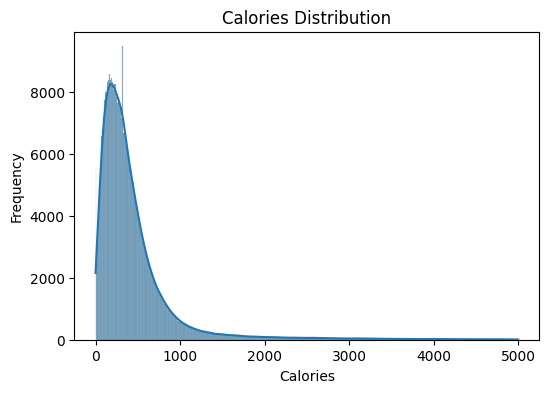

In [101]:
# plotting the distribution of calories values in the dataset  before normalization
plt.figure(figsize=(6, 4))
sns.histplot(recipe['Calories'], kde=True)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


In [102]:
recipe.describe()

,Calories,FatContent,CarbohydrateContent,ProteinContent,FiberContent,SodiumContent,SugarContent,CholesterolContent
count,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000,522512.000000
mean,445.061745,23.525727,46.827550,17.151759,3.808165,627.498736,20.963626,78.593008
std,512.040543,36.901262,78.529928,21.993438,6.053171,890.323479,56.375739,111.855325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.200000,5.600000,12.800000,3.500000,0.800000,123.300000,2.500000,3.800000
50%,315.400000,13.700000,28.100000,9.100000,2.200000,350.800000,6.400000,42.100000
75%,522.900000,27.300000,50.900000,25.000000,4.500000,781.125000,17.900000,106.200000
max,4999.800000,499.600000,999.600000,499.000000,195.200000,9996.100000,999.200000,999.900000


In [103]:
from sklearn.preprocessing import normalize
import pandas as pd

# Assuming your DataFrame is called 'recipe'
# Select the relevant numeric columns for similarity
nutrition_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 
                  'ProteinContent', 'FiberContent', 'SodiumContent', 
                  'SugarContent', 'CholesterolContent']

# Ensure there are no missing values — if needed, fill them first
recipe[nutrition_cols] = recipe[nutrition_cols].fillna(0)

# Apply L2 normalization (each row will have a unit norm)
normalized_array = normalize(recipe[nutrition_cols], norm='l2')

# Create a new DataFrame with normalized data
normalized_df = pd.DataFrame(normalized_array, columns=[col + '_norm' for col in nutrition_cols])

# Concatenate with original recipe DataFrame if needed
recipe = pd.concat([recipe, normalized_df], axis=1)


In [104]:
# data encoding for categorical values 
# The LabelEncoder from sklearn performs this operation.
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()
# apply the encoder to the dataset 

health['gender'] = le.fit_transform(health['gender'])

health.info()




<class 'pandas.core.frame.DataFrame'>
Index: 197426 entries, 1164 to 687242
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   health_condition  197426 non-null  object 
 1   activity_type     197426 non-null  object 
 2   age               197426 non-null  int64  
 3   gender            197426 non-null  int64  
 4   height_cm         197426 non-null  float64
 5   weight_kg         197426 non-null  float64
 6   bmi               197426 non-null  float64
 7   calories_burned   197426 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 13.6+ MB


In [105]:
health['health_condition'].value_counts()

health_condition
Hypertension    99437
Diabetes        64754
Asthma          33235
Name: count, dtype: int64

In [106]:
#get the name of diet first 10 
recipe['Name'].head(10)

0             low-fat berry blue frozen dessert
1                                       biryani
2                                 best lemonade
3                carina's tofu-vegetable kebabs
4                                  cabbage soup
5                          best blackbottom pie
6                        warm chicken a la king
7    buttermilk pie with gingersnap crumb crust
8                       a jad - cucumber pickle
9                          butter pecan cookies
Name: Name, dtype: object

In [107]:
# The 'Keywords' column is a list, so join it into a string for searching
def infer_meal_type(row):
    for field in ['RecipeCategory', 'Keywords', 'Name']:
        val = row[field]
        if isinstance(val, list):
            text = " ".join([str(x) for x in val]).lower()
        else:
            text = str(val).lower() if pd.notnull(val) else ''
        if 'breakfast' in text or 'brunch' in text:
            return 'breakfast'
        elif 'lunch' in text:
            return 'lunch'
        elif 'dinner' in text or 'supper' in text:
            return 'dinner'
        elif 'snack' in text:
            return 'snack'
    return 'general'

recipe['MealType'] = recipe.apply(infer_meal_type, axis=1)


In [108]:
recipe['MealType'].value_counts()

MealType
general      428631
breakfast     51495
lunch         40598
dinner         1419
snack           374
Name: count, dtype: int64

In [109]:

count=recipe['Images']=="character(0)"
print(f"Number of rows with 'Images' as 'character(0)': {count.sum()}")
# replace the character(0) with image not found
recipe['Images'] = recipe['Images'].replace("character(0)", "image not found")
recipe.head(5)

Number of rows with 'Images' as 'character(0)': 0


,Name,Description,Images,RecipeInstructions,Keywords,RecipeCategory,Calories,FatContent,CarbohydrateContent,ProteinContent,...,Type,Calories_norm,FatContent_norm,CarbohydrateContent_norm,ProteinContent_norm,FiberContent_norm,SodiumContent_norm,SugarContent_norm,CholesterolContent_norm,MealType
0,low-fat berry blue frozen dessert,make and share this low-fat berry blue frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,"[toss 2 cups berries with sugar., let stand fo...","[dessert, low protein, low cholesterol, health...",frozen desserts,170.9,2.5,37.1,3.2,...,vegetarian,0.948322,0.013872,0.205867,0.017757,0.019976,0.165360,0.167579,0.044392,general
1,biryani,make and share this biryani recipe from food.com.,[https://img.sndimg.com/food/image/upload/w_55...,[soak saffron in warm milk for 5 minutes and p...,"[chicken thigh & leg, chicken, poultry, meat, ...",chicken breast,1110.7,58.8,84.4,63.4,...,non-vegetarian,0.899876,0.047639,0.068380,0.051366,0.007292,0.298473,0.016528,0.302038,general
2,best lemonade,this is from one of my first good house keepi...,[https://img.sndimg.com/food/image/upload/w_55...,"[into a 1 quart jar with tight fitting lid, pu...","[low protein, low cholesterol, healthy, summer...",beverages,311.1,0.2,81.5,0.3,...,vegetarian,0.940619,0.000605,0.246417,0.000907,0.001209,0.005442,0.233416,0.000000,general
3,carina's tofu-vegetable kebabs,this dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,"[drain the tofu, carefully squeezing out exces...","[beans, vegetable, low cholesterol, weeknight,...",soy/tofu,536.1,24.0,64.2,29.3,...,non-vegetarian,0.324848,0.014543,0.038902,0.017754,0.010483,0.944429,0.019451,0.000000,general
4,cabbage soup,make and share this cabbage soup recipe from f...,[https://img.sndimg.com/food/image/upload/w_55...,"[mix everything together and bring to a boil.,...","[low protein, vegan, low cholesterol, healthy,...",vegetable,103.6,0.4,25.1,4.3,...,non-vegetarian,0.107314,0.000414,0.026000,0.004454,0.004972,0.993693,0.018335,0.000000,general


In [110]:
#getting the images
recipe['Images'] = recipe['Images'].apply(lambda x: x if isinstance(x, list) else [x])
# Ensure all images are lists
recipe['Images'] = recipe['Images'].apply(lambda x: x if isinstance(x, list) else [x])
# Check the first few rows to confirm
recipe['Images'].head(5)

0    [https://img.sndimg.com/food/image/upload/w_55...
1    [https://img.sndimg.com/food/image/upload/w_55...
2    [https://img.sndimg.com/food/image/upload/w_55...
3    [https://img.sndimg.com/food/image/upload/w_55...
4    [https://img.sndimg.com/food/image/upload/w_55...
Name: Images, dtype: object

In [111]:
recipe['Keywords'].dropna().head(10)

0    [dessert, low protein, low cholesterol, health...
1    [chicken thigh & leg, chicken, poultry, meat, ...
2    [low protein, low cholesterol, healthy, summer...
3    [beans, vegetable, low cholesterol, weeknight,...
4    [low protein, vegan, low cholesterol, healthy,...
5           [dessert, weeknight, stove top, < 4 hours]
6                           [poultry, meat, < 60 mins]
7       [dessert, healthy, weeknight, oven, < 4 hours]
8                 [thai, asian, free of..., < 30 mins]
9    [cookie & brownie, fruit, nuts, weeknight, ove...
Name: Keywords, dtype: object

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import re

# Activity multipliers
activity_multipliers = {
    'walking': 1.2,
    'yoga': 1.3,
    'dancing': 1.45,
    'weight training': 1.55,
    'cycling': 1.6,
    'basketball': 1.7,
    'swimming': 1.75,
    'tennis': 1.75,
    'running': 1.8,
    'hiit': 1.9
}

# --- Utility Functions ---

def get_activity_multiplier(activity_type):
    return activity_multipliers.get(activity_type.lower(), 1.2)

def calculate_bmr(weight, height, age, gender):
    return 10 * weight + 6.25 * height - 5 * age + (5 if gender == 1 else -161)

def calorie_target(bmr, goal):
    if goal == 'weight_loss':
        return bmr - 500
    elif goal == 'weight_gain':
        return bmr + 500
    return bmr

def format_instructions(instructions):
    if isinstance(instructions, list):
        return "\n".join(f"{i+1}. {step.strip().capitalize()}" for i, step in enumerate(instructions) if step.strip())
    elif isinstance(instructions, str) and instructions.strip():
        steps = re.split(r'(?<=[.!?])\s+|(?<=;)\s+', instructions)
        formatted = ""
        for i, step in enumerate(steps, 1):
            step = step.strip().capitalize()
            if len(step) > 3:
                formatted += f"{i}. {step}\n"
        return formatted.strip()
    return "No instructions available."

def cluster_recipes(df, nutrient_cols, n_clusters=3):
    df = df.dropna(subset=nutrient_cols).copy()
    for col in nutrient_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=nutrient_cols)

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[nutrient_cols])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(scaled_data)

    return df, kmeans

def get_image_url(images):
    base_url = "https://img.sndimg.com"
    if isinstance(images, list) and len(images) > 0:
        image = images[0]
    elif isinstance(images, str):
        image = images
    else:
        return "No image available"

    if image.startswith("/upload"):
        return f"{base_url}{image}"
    elif image.startswith("http"):
        return image
    else:
        return "No image available"

# --- Diet Recommendation Function ---

def suggest_diet(user_input, recipe):
    nutrient_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent']

    # 1. Filter by veg/non-veg
    filtered = recipe[recipe['Type'].str.lower() == user_input['Type'].lower()]

    # 2. Filter by meal type
    filtered = filtered[filtered['MealType'].str.lower() == user_input['meal_type'].lower()]

    # 3. Filter by health conditions
    for condition in user_input['health_conditions']:
        cond = condition.lower()
        if cond == 'diabetes':
            filtered = filtered[filtered['SugarContent'] <= 10]
        elif cond == 'hypertension':
            filtered = filtered[filtered['SodiumContent'] <= 400]
        elif cond == 'asthma':
            filtered = filtered[~filtered['RecipeInstructions'].str.contains('dairy', na=False, case=False)]

    if filtered.empty:
        print("\n❌ No recipes matched the filtering criteria.")
        return []

    # 4. Calculate BMR, TDEE, Calorie target
    bmr = calculate_bmr(user_input['weight_kg'], user_input['height_cm'], user_input['age'], user_input['gender'])
    tdee = bmr * get_activity_multiplier(user_input['activity_type'])

    goal_key = user_input['goal'].lower()
    if goal_key == 'wt_loss':
        goal_key = 'weight_loss'
    elif goal_key == 'wt_gain':
        goal_key = 'weight_gain'
    elif goal_key == 'maintain':
        goal_key = 'maintain'

    cal_target = calorie_target(tdee, goal_key)

    print(f"\n🧮 BMR: {bmr:.2f} kcal")
    print(f"⚙️  TDEE (Activity Adjusted): {tdee:.2f} kcal")
    print(f"🎯 Final Calorie Target (goal: {goal_key}): {cal_target:.2f} kcal\n")

    # 5. Drop invalid nutrient values
    filtered = filtered.dropna(subset=nutrient_cols)
    for col in nutrient_cols:
        filtered[col] = pd.to_numeric(filtered[col], errors='coerce')
    filtered = filtered.dropna(subset=nutrient_cols)

    if filtered.empty:
        print("❌ No valid nutrient data available.")
        return []

    # 6. Filter by cluster if available
    goal_to_cluster = {
        'weight_loss': [0],
        'weight_gain': [1],
        'maintain': [2]
    }
    target_clusters = goal_to_cluster.get(goal_key, [0])
    if 'cluster' in filtered.columns:
        filtered = filtered[filtered['cluster'].isin(target_clusters)]
        if filtered.empty:
            print("❌ No recipes matched the cluster for your goal.")
            return []

    # 7. Create target vector
    target_vector = [
        cal_target,
        cal_target * 0.25 / 9,
        cal_target * 0.50 / 4,
        cal_target * 0.25 / 4,
        10  # fiber target (g)
    ]

    # 8. Normalize and compute similarity
    scaler = MinMaxScaler()
    scaled_nutrients = scaler.fit_transform(filtered[nutrient_cols])

    target_vector_df = pd.DataFrame([target_vector], columns=nutrient_cols)
    target_vector_scaled = scaler.transform(target_vector_df)[0]

    data_min = scaler.data_min_
    data_max = scaler.data_max_

    similarity_scores = cosine_similarity([target_vector_scaled], scaled_nutrients).flatten()

    # 9. Select top matching recipes
    top_n = min(user_input['meal_frequency'], len(filtered))
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    top_recipes = filtered.iloc[top_indices].copy()
    top_recipes[nutrient_cols] = scaled_nutrients[top_indices] * (data_max - data_min) + data_min

    # 10. Build diet plan
    diet_plan = []
    for _, row in top_recipes.iterrows():
        diet_plan.append({
            'Name': row['Name'],
            'Calories (kcal)': round(row['Calories'], 2),
            'Fat (g)': round(row['FatContent'], 2),
            'Carbs (g)': round(row['CarbohydrateContent'], 2),
            'Protein (g)': round(row['ProteinContent'], 2),
            'Fiber (g)': round(row['FiberContent'], 2),
            'Sugar (g)': round(row.get('SugarContent', 0), 2),
            'Sodium (mg)': round(row.get('SodiumContent', 0), 2),
            'Image': get_image_url(row.get('Images', None)),
            'Instructions': format_instructions(row.get('RecipeInstructions', 'No instructions')),
        })

    return diet_plan


# --- Preprocessing Example ---
nutrient_cols = ['Calories', 'FatContent', 'CarbohydrateContent', 'ProteinContent', 'FiberContent']
recipe, kmeans_model = cluster_recipes(recipe, nutrient_cols, n_clusters=5)

# --- Sample Input ---
user_input = {
    'gender': 1,
    'age': 40,
    'height_cm': 150,
    'weight_kg': 50,
    'goal': 'wt_loss',
    'Type': 'vegetarian',
    'meal_type': 'lunch',
    'health_conditions': ['asthma'],
    'meal_frequency': 3,
    'activity_type': 'walking'
}

# --- Generate Diet Plan ---
diet_plan = suggest_diet(user_input, recipe)

if diet_plan:
    print("\n🍽️ Suggested Diet Plan:")
    for i, meal in enumerate(diet_plan, 1):
        print(f"\nMeal {i}:")
        for key, value in meal.items():
            print(f"{key}: {value}")



🧮 BMR: 1242.50 kcal
⚙️  TDEE (Activity Adjusted): 1491.00 kcal
🎯 Final Calorie Target (goal: weight_loss): 991.00 kcal


🍽️ Suggested Diet Plan:

Meal 1:
Name: crunchy sandwich
Calories (kcal): 228.6
Fat (g): 6.5
Carbs (g): 28.4
Protein (g): 13.4
Fiber (g): 2.2
Sugar (g): 2.7
Sodium (mg): 1073.1
Image: https://img.sndimg.com/food/image/upload/w_555
Instructions: 1. Place bread slices in front of you. spread mayo on each slice.
2. Add 2 slices of deli ham on 2 of the bread slices.
3. Now grab a handful of your favorite types of chips (i'd always do it with hot cheetos! yum!). place the chips on top of the ham covering it.
4. Now top off with a slice of tomato and lettuce. place the other 2 bread slices on top!
5. Bite in and enjoy that yummy crunch! :d.

Meal 2:
Name: tuna mushroom and myoga sandwich toast
Calories (kcal): 235.6
Fat (g): 6.3
Carbs (g): 29.6
Protein (g): 14.6
Fiber (g): 1.8
Sugar (g): 3.6
Sodium (mg): 515.6
Image: https://img.sndimg.com/food/image/upload/w_555
Instructi

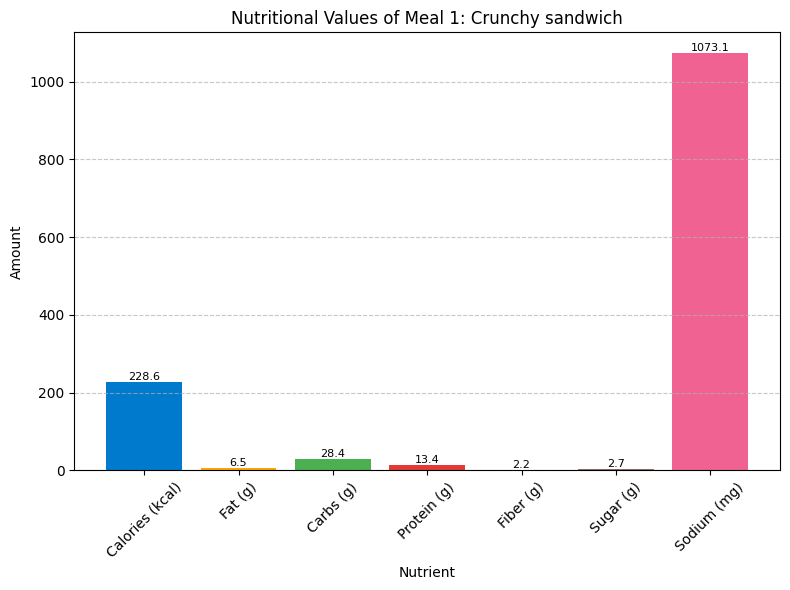

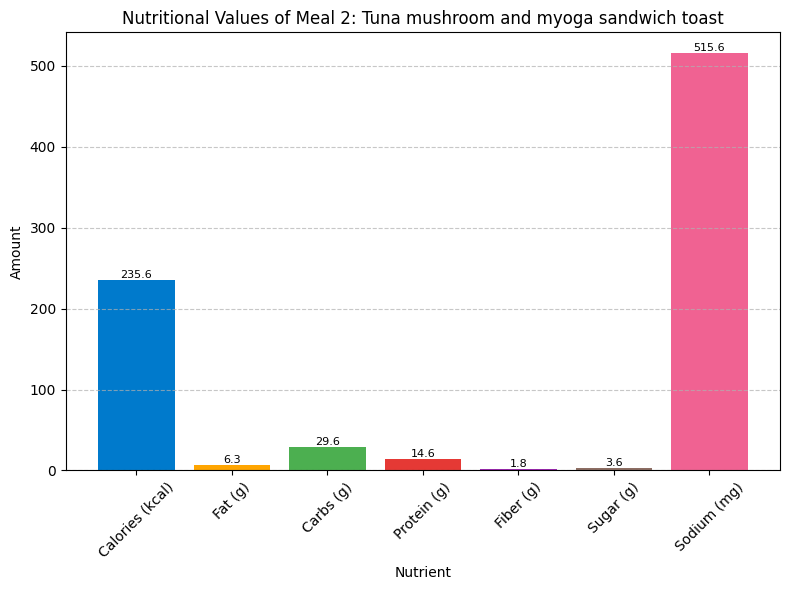

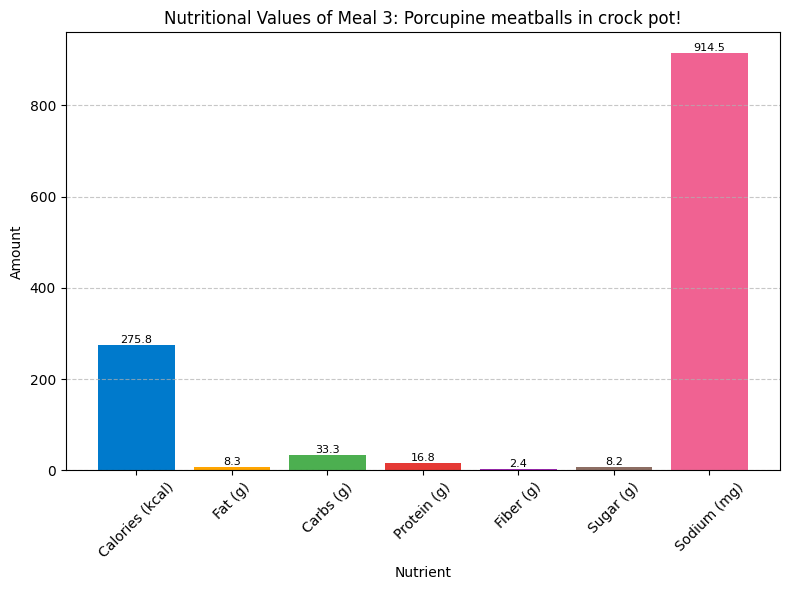

In [113]:
import matplotlib.pyplot as plt

# Define nutrients and their display units
nutrients = [
    ('Calories (kcal)', 'kcal'),
    ('Fat (g)', 'g'),
    ('Carbs (g)', 'g'),
    ('Protein (g)', 'g'),
    ('Fiber (g)', 'g'),
    ('Sugar (g)', 'g'),
    ('Sodium (mg)', 'mg'),
    
]

# Plot each meal in the diet plan
for i, meal in enumerate(diet_plan):
    labels = [f"{n[0]}" for n in nutrients]
    values = [meal.get(n[0], 0) for n in nutrients]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, values, color=['#007acc', '#ffa500', '#4caf50', '#e53935', '#9c27b0', '#8d6e63', '#f06292', '#64b5f6'])

    # Annotate each bar with its value
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(),
                 f'{value:.1f}', ha='center', va='bottom', fontsize=8)

    plt.title(f'Nutritional Values of Meal {i+1}: {meal["Name"].capitalize()}', fontsize=12)
    plt.xlabel('Nutrient')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
